<a href="https://colab.research.google.com/github/TVHM/summer_microcredentials_BUS/blob/main/Group_7_mcphearson__diabetes_miniproject_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [594]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm


Overview

The PIMA Indian Diabetes Disease Database constraint is limited by consisting of only women at least 21 years of age and of Pima Indian descent, is *admittedly* a diagnostic drawback in predicting whether or not a **all** patients admitted for hostpital care have diabetes or not, but basis of the model certainly consists of a universal approach that attempts to include everyone within the hospital's regional population.
In addtion to pregnancy, this prediction model also includes a diagnostic measurementfor a *diabtes pedigree function, skin thickness and age*.

Predictor - independent variables
Target      dependent variable is the *'outcome'*
Training and Testing Models: Logistic Regression, Confusion Matrix Report and Linear Regression Classifier 

Data Collection and Analysis

PIMA Data Set 

In [595]:
 #loading the data set to a dataframe and data varaiable defined 
diabetes_dataset = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
 
konstrnt_stud = diabetes_dataset

In [596]:
pd.read_csv?

In [597]:
konstrnt_stud.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [598]:
dataset = konstrnt_stud 

In [599]:
dataset.shape

(768, 9)

In [600]:
#print row 5 assign name survey sample 5

print(konstrnt_stud.loc[5])

Pregnancies                   5.000
Glucose                     116.000
BloodPressure                74.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          25.600
DiabetesPedigreeFunction      0.201
Age                          30.000
Outcome                       0.000
Name: 5, dtype: float64


#Target Variable : 'Outcome'

per group study 
emery project guide

In [601]:
#Review distribution  of targets 
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

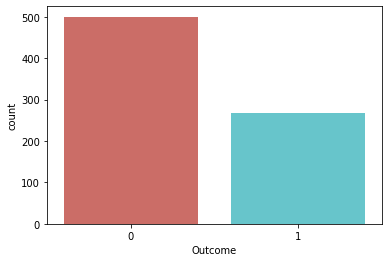

<Figure size 432x288 with 0 Axes>

In [602]:
#Plot outcome counts
sns.countplot(x='Outcome',data=dataset, palette='hls')
plt.show()
plt.savefig('DiabetesOutcome_plt')

In [603]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [604]:
#find missing values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [605]:
# outocome 0, 1 
konstrnt_stud['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [606]:
konstrnt_stud.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [607]:
X = konstrnt_stud.drop(columns = 'Outcome', axis=1)
Y = konstrnt_stud['Outcome']

In [608]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [609]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#Prepare Data

In [610]:
dataset['Outcome'].unique()

array([1, 0])

In [611]:
#prepare dataset for training 
x = dataset.iloc[:, :1]   # feature values- all columns except last one in the data framem
y = dataset.iloc[:, -1]   #target values  - last column of data frame

In [612]:
#Split data into 80% training and 20% testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [613]:
x_train

,Pregnancies
60,2
618,9
346,1
294,0
231,6
...,...
71,5
106,1
270,10
435,0


In [614]:
x_test

,Pregnancies
668,6
324,2
624,2
690,8
473,7
...,...
355,9
534,1
344,8
296,2


Data Standardization / Normalization 

In [615]:
means  = np.mean(x_train, axis=0)   #Conmpute average (mean)
stds = np.std(x_train, axis=0)      #Compute standard deviation

x_train = (x_train - means) / stds   #Normalize data values in training set
x_test = (x_test - means)/ stds      # Normalize data values in test_set

In [616]:
x_train

,Pregnancies
60,-0.526397
618,1.588046
346,-0.828460
294,-1.130523
231,0.681856
...,...
71,0.379793
106,-0.828460
270,1.890109
435,-1.130523


In [617]:
x_test

,Pregnancies
668,0.681856
324,-0.526397
624,-0.526397
690,1.285983
473,0.983919
...,...
355,1.588046
534,-0.828460
344,1.285983
296,-0.526397


In [618]:
#scaler variable 
scaler = StandardScaler()


In [619]:
scaler.fit(X)

StandardScaler()

In [620]:
standardized_data = scaler.transform(X)

In [621]:
print(standardized_data)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [622]:
X = standardized_data
Y = konstrnt_stud['Outcome']

In [623]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split 

In [624]:
# name varibles 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [625]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


#Training the model 

In [626]:
#Train logistic regression model 
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

#Logistic Regression Model Evaluation
Model performance metrics

In [627]:
#Test the Model 
predictionss = model.predict(x_test)

#Check precision, recall, F1 score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        99
           1       0.68      0.27      0.39        55

    accuracy                           0.69       154
   macro avg       0.69      0.60      0.59       154
weighted avg       0.69      0.69      0.65       154



In [628]:
#Display coefficients
coeff = list(model.coef_[0])
coeff

[0.4279499582872261]

In [629]:
#Extract feature names
labels = list(dataset.drop('Outcome',1).columns)
labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

#Logistic Regression Model Accuracy 


In [630]:
#Calculate model acuracy 
accuracy = model.score(x_test, y_test)
print("accuracy -", accuracy * 100, "%")

accuracy - 69.48051948051948 %


#Logistic Regression Confusion Matrix

In [649]:
confusion_matrix(y_test, predictions)

array([[92,  7],
       [40, 15]])

#Linear Regression Model Evaluation

In [631]:
classifier = svm.SVC(kernel='linear')

In [632]:
#training the support vector Machine Classiifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Accuracy Score 

In [633]:
#accuracy score on the training data

In [634]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [635]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [636]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [637]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a predictiive System 

In [638]:
input_data = (8,99,84,0,0,35.4,0.388,50)

#changing the input data to nupy array
input_data_as_numpy_array = np.array(input_data)

#reshape the array as we are prdicting for one instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
                                            
#standardized the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

[[ 1.23388019 -0.68523633  0.77001375 -1.28821221 -0.69289057  0.43246741
  -0.25331639  1.4259954 ]]
[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [639]:
konstrnt_stud.groupby('SkinThickness').mean()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
SkinThickness,,,,,,,,
0,4.638767,123.449339,64.118943,0.000000,30.129956,0.393291,37.251101,0.387665
7,9.000000,110.500000,76.000000,292.000000,23.600000,0.754000,52.000000,0.500000
8,1.000000,99.500000,64.000000,91.000000,24.950000,1.042500,28.500000,0.000000
10,1.400000,93.400000,54.400000,79.800000,26.200000,0.515000,22.200000,0.000000
11,2.166667,98.333333,72.666667,69.166667,25.083333,0.430667,24.333333,0.000000
12,2.571429,109.000000,70.285714,79.285714,25.671429,0.464571,29.571429,0.142857
13,1.636364,109.363636,61.090909,97.636364,22.954545,0.366636,23.272727,0.090909
14,1.500000,135.666667,69.666667,176.500000,26.783333,0.428667,23.833333,0.333333
15,2.928571,118.642857,72.071429,78.785714,26.878571,0.432571,30.357143,0.071429


# patients sample_row_5

In [640]:
#(rand(768,4),['skinthickness','insulin','diabetespedigreefunction','bmi','outcome'] )


In [641]:
#pandas series

In [642]:
#dataset = pd.Series() two dimensional with assigned indexe values

a = ['skinthickness','bmi','diabethespedigreefunction','age','outcome']
label= ['x','y','z','a','b']
dataset1 = pd.Series(data=a, index=label )  #convert list to the pandas series

print(dataset1)

 




x                skinthickness
y                          bmi
z    diabethespedigreefunction
a                          age
b                      outcome
dtype: object


In [643]:
#dataset = konstrnt_stud
#label= ['x','y','z','a','b','c','t','v','m',]
#= pd.Series(dataset=konstrnt_stud)
#print(dataset)

In [644]:
dataset = konstrnt_stud 

#numpy

In [645]:
#random Numbers 
from numpy import random 
x=random.randint(100, size=(200))
print(x)

[66 92 98 17 83 57 86 97 96 47 73 32 46 96 25 83 78 36 96 80 68 49 55 67
  2 84 39 66 84 47 61 48  7 99 92 52 97 85 94 27 34 97 76 40  3 69 64 75
 34 58 10 22 77 18 15 27 30 52 70 26 80  6 14 75 54 71  1 43 58 55 25 50
 84 56 49 12 18 81  1 51 44 48 56 91 49 86  3 67 11 21 89 98  3 11  3 94
  6  9 87 14 83 70 12 54 27 38 17 61 74 99 99 65 47 16  5 86 46 15 59 40
 25 45 49  0 35 29  1 83 68 30  7 93 60 65 76 67 44 51  7 88 70 13 28 63
 84 36 96 40 88 63 58 77  8 78  6 65 94 70 40 74 76 76 25  7 13 44  1 41
 78 56 87 63 97  3 17 88 87 69 97 50  2 18 46 45 57 35 18 91 46 54 73 81
 62 67 11 26 92 75 10  3]


In [646]:
from numpy.random import randn
np.random.seed(123)
x = random.rand()
print(x)

0.6964691855978616


In [647]:
import numpy as np

#loading the data set to a dataframe and data varaiable defined 
diabetes_dataset = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
 
konstrnt_stud = diabetes_dataset

dataset = np.array(konstrnt_stud )
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

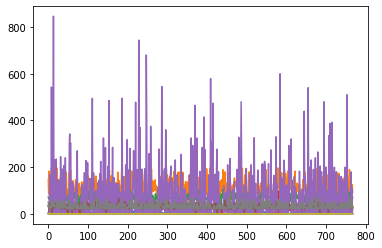

In [648]:
plt.plot(dataset)

#Conclusion

The calculated mean and standard deviation
______________________________

of age and outcome show similarities. In fact, exploratory research indicates a corelation between body mass index, gender, skin thickness and age relative to the outcome of the effects ofthe diseaese overtime.   

The accuracy of our test indicates that _________________________________.

According to our data, a 0 label signifies non diabetic result and alternatively, 1 repreesenting diabetic result. 